In [11]:
!pip install tabulate colorama
from math import sqrt,pi,log
import pandas as pd
from tabulate import tabulate
from colorama import Fore, Style

Una torre de enfriamiento opera a contracorriente donde entra agua a 105 °F y sale a 85 °F cuando el aire tiene una temperatura de bulbo seco y bulbo húmedo de 90 °F y 76 °F. La torre tiene un empaque estático de plástico de 4 ft y los flujos son Gy= 2,000 lb/h ft^2 y Gx=2,200 lb/h ft^2.

a) Determine el número de unidades de transferencia, la altura de la unidad de transferencia basada en la fuerza impulsa del gas.

*Entalpía de vaporización en el estado 0 (32°F)* [Btu/lb]
\begin{equation}
\lambda_{0}=1075.4
\end{equation}

**Leer la carta de humedad agua-aire a 1 atm para resolver el problema**
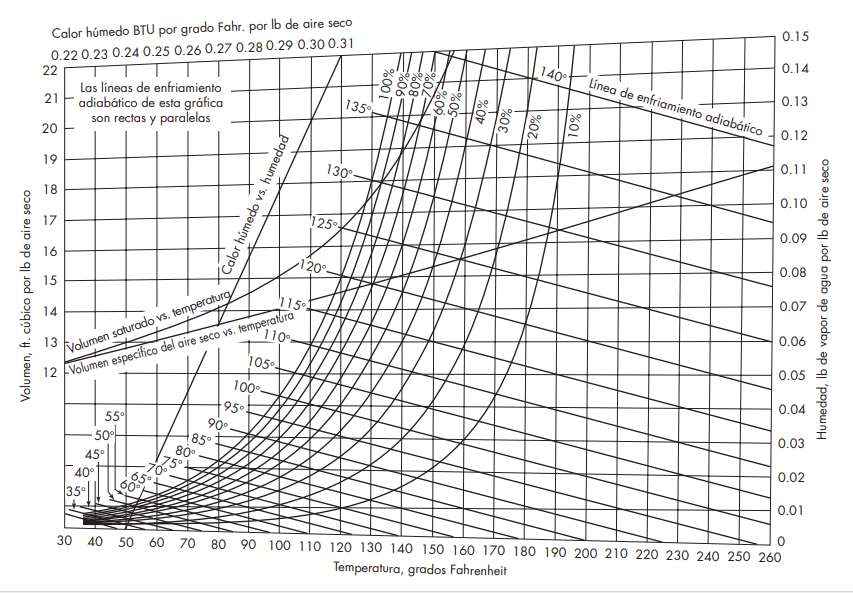

Inserte la Humedad del sistema (lb de agua/lb aire): 0.017
Inserte la Humedad de saturación (lb de agua/lb aire): 0.031
Inserte el valor del calor húmedo (Btu/°F lb aire ): 0.248
+----+------+---------+---------+---------+│
|    |   Tx |      H* |       H |    H*-H |│
+====+======+=========+=========+=========+│
|  0 |   85 | 41.9869 | 32.6658 |  9.3211 |│
+----+------+---------+---------+---------+│
|  1 |   95 | 54.9978 | 43.6658 | 11.332  |│
+----+------+---------+---------+---------+│
|  2 |  105 | 74      | 54.6658 | 19.3342 |│
+----+------+---------+---------+---------+│



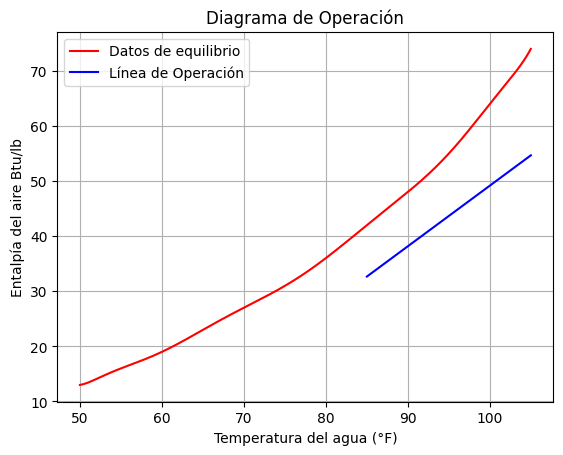

La altura de la unidad de transferencia es: 2.2185 ft
El número de unidades de transferencia es: 1.8030


In [20]:
import matplotlib.pyplot as plt
import numpy as np

Hb=float(input("Inserte la Humedad del sistema (lb de agua/lb aire): ")) #Inserte estos valores en función de lo leído en la gráfica
Hbmax=float(input("Inserte la Humedad de saturación (lb de agua/lb aire): "))
cs=float(input("Inserte el valor del calor húmedo (Btu/°F lb aire ): "))

def Hr(Hb,Hbmax):
  return (Hb/Hbmax)*100

HR=Hr(Hb,Hbmax)
lambda0=1075.4 #Btu/lb
T_0=32 #°F
T_wet=76 #°F
T_dry=90 #°F
T_in=105 #°F
T_out=85 #°F
Z= 4 #ft
Gx=2200 #lb/h ft^2
Gy=2000 #lb/h ft^2
Cp= 1 #BTU/lb °F


def Enthalpy(cs,T_dry,T_0,lambda0,Hb): #Se calcula la entalpía Hb (Gas Entrada)
  return (cs)*(T_dry-T_0)+lambda0*Hb

Enthalpyb=Enthalpy(cs,T_dry,T_0,lambda0,Hb)

#Se hace un balance de energía para determinar Ha (Gas salida)
def BalEnt(Gx,Cp,T_in,T_out,Gy,Enthalpyb):
  return (Gx*Cp*(T_in-T_out))/(Gy)+Enthalpyb

Enthalpya=BalEnt(Gx,Cp,T_in,T_out,Gy,Enthalpyb)

H_eq=[13,16,19,23,27,31,36,42,48,55,64,74]
T_eq=[50,55,60,65,70,75,80,85,90,95,100,105]

alfa_coefx=np.polyfit(T_eq,H_eq,10) #Se ajustan los puntos por medio de un ajuste polinómico
x_eq=np.arange(50,105,0.01)
y_eq=np.polyval(alfa_coefx,x_eq)

T=[T_out,(T_out+T_in)/2,T_in]
H=[Enthalpyb,(Enthalpyb+Enthalpya)/2,Enthalpya]
H_eq=[np.polyval(alfa_coefx,T_out),np.polyval(alfa_coefx,(T_out+T_in)/2),np.polyval(alfa_coefx,T_in)]
Hmenos=[H_eq[0]-H[0],H_eq[1]-H[1],H_eq[2]-H[2]]

def NOy(yb,yT,yb_eq,yT_eq):
  return (yb-yT)/(((yb-yb_eq)-(yT-yT_eq))/log(((yb-yb_eq))/((yT-yT_eq))))

N_Sup=NOy(H[0],H[1],H_eq[0],H_eq[1])
N_Inf=NOy(H[1],H[2],H_eq[1],H_eq[2])
N=N_Sup+N_Inf
HOy=(Z/N)




data = {
  "Tx": T,
  "H*": H_eq,
  "H": H,
  "H*-H":Hmenos,

}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'

print(colored_table)

plt.plot(x_eq,y_eq,color='red',label='Datos de equilibrio')
plt.plot(T,H, color='blue', label='Línea de Operación')
#plt.plot(yRaoult,PRaoult,color='slategrey',label='Ley de Raoult (Vap)')


plt.xlabel('Temperatura del agua (°F)')
plt.ylabel('Entalpía del aire Btu/lb')
plt.title('Diagrama de Operación')
plt.legend()
plt.grid(True)
plt.show()

print("La altura de la unidad de transferencia es: %.4f ft"%HOy)
print("El número de unidades de transferencia es: %.4f"%N)


